In [4]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# считывание данных из csv-файла

data = pd.read_csv('/content/yellow_tripdata_2020-01.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# размерность данных
data.shape

(6405008, 17)

In [7]:
# первые 5 записей набора данных

data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,,,,,,,,,,,,,,,,,
1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


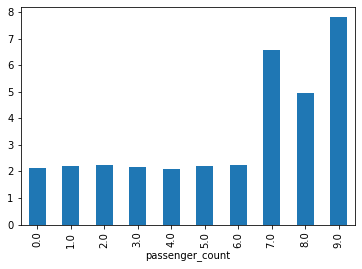

In [8]:
# построим график зависимости чаевых от количества пассажиров
# для этого сгруппируем данные по количеству пассажиров и найдем среднее значение чаевых для каждой группы

data.groupby(by="passenger_count")["tip_amount"].mean().plot(kind = "bar")

In [9]:
data.groupby(by="passenger_count")["tip_amount"].mean()

passenger_count
0.0    2.117647
1.0    2.214389
2.0    2.233318
3.0    2.161958
4.0    2.070792
5.0    2.219931
6.0    2.233537
7.0    6.552759
8.0    4.960000
9.0    7.793158
Name: tip_amount, dtype: float64

Вывод: 

- при количестве пассажиров от 0 до 6 среднее значение чаевых примерно одинаково и составляет порядка 2 ден.ед.;

- при количестве пассажиров от 7 человек и более сумма чаевых значительно возрастает и наибольшее значение достигается при количестве пассажиров равном 9  (~7.8 ден.ед.).

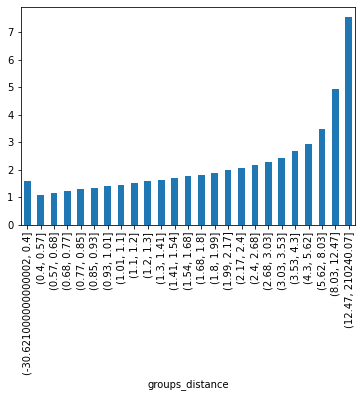

In [10]:
# построим график зависимости чаевых от пройденного расстояния
# для этого непрерывную переменную "пройденное расстояние" разобъем на 25 групп
# сгруппируем данные по выделенным интервалам и найдем среднее значение чаевых для каждого интервала

data["groups_distance"] = pd.qcut(data["trip_distance"], q=25)

data.groupby(by="groups_distance")["tip_amount"].mean().plot(kind = "bar")

In [11]:
data.groupby(by="groups_distance")["tip_amount"].mean()

groups_distance
(-30.621000000000002, 0.4]    1.568172
(0.4, 0.57]                   1.065406
(0.57, 0.68]                  1.154429
(0.68, 0.77]                  1.225028
(0.77, 0.85]                  1.279211
(0.85, 0.93]                  1.341810
(0.93, 1.01]                  1.395405
(1.01, 1.1]                   1.450453
(1.1, 1.2]                    1.507821
(1.2, 1.3]                    1.570238
(1.3, 1.41]                   1.628354
(1.41, 1.54]                  1.687948
(1.54, 1.68]                  1.749223
(1.68, 1.8]                   1.812304
(1.8, 1.99]                   1.889273
(1.99, 2.17]                  1.967607
(2.17, 2.4]                   2.063672
(2.4, 2.68]                   2.165717
(2.68, 3.03]                  2.286403
(3.03, 3.53]                  2.432572
(3.53, 4.3]                   2.664957
(4.3, 5.62]                   2.939803
(5.62, 8.03]                  3.468638
(8.03, 12.47]                 4.928456
(12.47, 210240.07]            7.535603
Name: tip

In [12]:
# максимальное значение пройденного расстояния

max_distance = data["trip_distance"].max()
max_distance

210240.07

In [13]:
# минимальное значение пройденного расстояния

min_distance = data["trip_distance"].min()
min_distance

-30.62

Вывод:

- согласно полученному графику можно сделать вывод, что в среднем при увеличении дистанции поездки увеличивается значение чаевых;

- отметим, что в данных для пройденного расстояния имеются аномальные минимальное и максимальное значения (поэтому для более детальной аналитики необходимо более подробно исследовать имеющиеся данные).